In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
stars = pd.read_csv('6 class csv.csv')
stars

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Class  
0            0        Red              M  
1            0        Red              M  
2            0        Red              M  
3            0        Red              M  
4            0        Red              M  
..         ...        ...            ...  
235          5       Blue              O  
236          5       Blue              O  
237          5      White              A  
238          5      White              A  
239          5       Blue              O  

[240 rows x 7 columns]

In [3]:
stars['Star type'].replace(0, 'Brown Dwarf', inplace=True)
stars['Star type'].replace(1, 'Red Dwarf ', inplace=True)
stars['Star type'].replace(2, 'White Dwarf', inplace=True)
stars['Star type'].replace(3, 'Main Sequence', inplace=True)
stars['Star type'].replace(4, 'Supergiant', inplace=True)
stars['Star type'].replace(5, 'Hypergiant', inplace=True)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stars[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']] = scaler.fit_transform(stars[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']])

In [5]:
from sklearn import model_selection
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(stars[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']], stars['Star type'], test_size=0.3)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
stars_rf = RandomForestClassifier(oob_score=True).fit(train_data,train_labels)
stars_rf.oob_score_ 

0.9940476190476191

In [8]:
stars_rf_predict = stars_rf.predict(test_data)
print(metrics.classification_report(test_labels, stars_rf_predict))

               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00        11
Main Sequence       1.00      1.00      1.00        10
   Red Dwarf        1.00      1.00      1.00        17
   Supergiant       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00        14

     accuracy                           1.00        72
    macro avg       1.00      1.00      1.00        72
 weighted avg       1.00      1.00      1.00        72



In [9]:
metrics.confusion_matrix(test_labels, stars_rf_predict)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 14]], dtype=int64)

In [10]:
stars_rf_2 = RandomForestClassifier(oob_score=True, min_samples_leaf=4).fit(train_data,train_labels)
stars_rf_2.oob_score_

0.9940476190476191

In [11]:
stars_rf_predict_2 = stars_rf_2.predict(test_data)
print(metrics.classification_report(test_labels, stars_rf_predict_2))

               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00        11
Main Sequence       1.00      1.00      1.00        10
   Red Dwarf        1.00      1.00      1.00        17
   Supergiant       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00        14

     accuracy                           1.00        72
    macro avg       1.00      1.00      1.00        72
 weighted avg       1.00      1.00      1.00        72



In [12]:
metrics.confusion_matrix(test_labels, stars_rf_predict_2)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 14]], dtype=int64)

In [13]:
stars_rf_predict_proba = stars_rf.predict_proba(test_data)
stars_rf_predict_proba 

array([[0.  , 0.  , 0.97, 0.03, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.65, 0.  , 0.  , 0.35, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.02, 0.  , 0.  , 0.98, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.

In [14]:
fpr, tpr, treshold = metrics.roc_curve(y_true=test_labels, y_score=stars_rf_predict_proba[:,2], pos_label='Main Sequence')
roc_auc = metrics.auc(fpr,tpr)
roc_auc

1.0

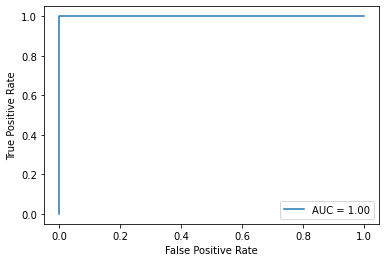

In [15]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [16]:
fpr, tpr, treshold = metrics.roc_curve(y_true=test_labels, y_score=stars_rf_predict_proba[:,3], pos_label='Red Dwarf ')
roc_auc = metrics.auc(fpr,tpr)
roc_auc

1.0

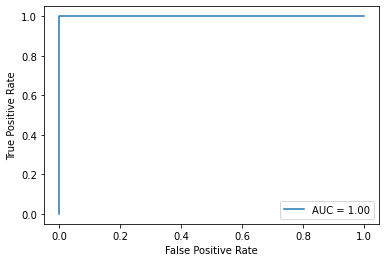

In [17]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [18]:
from xgboost import XGBClassifier

In [19]:
stars_XGB = XGBClassifier().fit(train_data, train_labels)

[14:59:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\0\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [20]:
stars_XGB_predict = stars_XGB.predict(test_data)
stars_XGB_predict

array(['Main Sequence', 'White Dwarf', 'White Dwarf', 'Brown Dwarf',
       'Main Sequence', 'Brown Dwarf', 'White Dwarf', 'Supergiant',
       'Hypergiant', 'Supergiant', 'Supergiant', 'Red Dwarf ',
       'Red Dwarf ', 'Red Dwarf ', 'Hypergiant', 'Supergiant',
       'Red Dwarf ', 'Supergiant', 'Red Dwarf ', 'Hypergiant',
       'Main Sequence', 'Hypergiant', 'White Dwarf', 'Supergiant',
       'Red Dwarf ', 'Supergiant', 'Supergiant', 'Red Dwarf ',
       'Main Sequence', 'Hypergiant', 'Supergiant', 'Brown Dwarf',
       'Red Dwarf ', 'White Dwarf', 'Hypergiant', 'Red Dwarf ',
       'Red Dwarf ', 'Supergiant', 'Red Dwarf ', 'Red Dwarf ',
       'White Dwarf', 'Main Sequence', 'Main Sequence', 'White Dwarf',
       'White Dwarf', 'Red Dwarf ', 'Hypergiant', 'Main Sequence',
       'Main Sequence', 'Main Sequence', 'Brown Dwarf', 'White Dwarf',
       'Hypergiant', 'Brown Dwarf', 'Hypergiant', 'White Dwarf',
       'Supergiant', 'Red Dwarf ', 'Brown Dwarf', 'Red Dwarf ',
       'Whit

In [21]:
print(metrics.classification_report(test_labels, stars_XGB_predict))

               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00        11
Main Sequence       1.00      1.00      1.00        10
   Red Dwarf        1.00      1.00      1.00        17
   Supergiant       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00        14

     accuracy                           1.00        72
    macro avg       1.00      1.00      1.00        72
 weighted avg       1.00      1.00      1.00        72



In [22]:
stars_XGB_predict_proba = stars_XGB.predict_proba(test_data)
stars_XGB_predict_proba

array([[0.0058766 , 0.00643384, 0.9726624 , 0.00484221, 0.00448961,
        0.00569538],
       [0.00313684, 0.00343429, 0.00476579, 0.00294363, 0.00265633,
        0.9830631 ],
       [0.00313766, 0.00343518, 0.00476703, 0.00294439, 0.00239711,
        0.9833187 ],
       [0.9862884 , 0.00267243, 0.00208513, 0.00472343, 0.00186485,
        0.0023657 ],
       [0.00288082, 0.00315399, 0.98636   , 0.00237374, 0.00243952,
        0.00279198],
       [0.6266735 , 0.00194804, 0.00151994, 0.3667747 , 0.00135937,
        0.00172445],
       [0.00313684, 0.00343429, 0.00476579, 0.00294363, 0.00265633,
        0.9830631 ],
       [0.0021822 , 0.00238913, 0.00488806, 0.0017981 , 0.98662764,
        0.00211491],
       [0.00219126, 0.9831822 , 0.00275971, 0.00180556, 0.00793759,
        0.00212369],
       [0.00245541, 0.00268824, 0.00550003, 0.00202321, 0.9849534 ,
        0.00237969],
       [0.00293219, 0.00321023, 0.00369285, 0.00241607, 0.9849069 ,
        0.00284177],
       [0.00415702, 0

In [23]:
fpr, tpr, treshold = metrics.roc_curve(y_true=test_labels, y_score=stars_XGB_predict_proba[:,2], pos_label='Main Sequence')
roc_auc = metrics.auc(fpr,tpr)
roc_auc

1.0

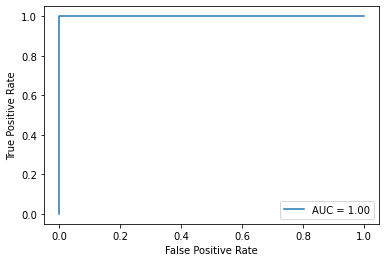

In [24]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [25]:
main_sequence = stars
main_sequence['Star type'].replace('Brown Dwarf', 'Not Main Sequence', inplace=True)
main_sequence['Star type'].replace('Red Dwarf ', 'Not Main Sequence', inplace=True)
main_sequence['Star type'].replace('White Dwarf', 'Not Main Sequence', inplace=True)
main_sequence['Star type'].replace('Supergiant', 'Not Main Sequence', inplace=True)
main_sequence['Star type'].replace('Hypergiant', 'Not Main Sequence', inplace=True)

In [26]:
from sklearn import model_selection
train_x, test_x, train_y, test_y = model_selection.train_test_split(main_sequence[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']], main_sequence['Star type'], test_size=0.3)

In [27]:
main_sequence_XGB = XGBClassifier().fit(train_x, train_y)

[14:59:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\0\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [28]:
main_sequence_XGB_predict = main_sequence_XGB.predict(test_x)
main_sequence_XGB_predict

array(['Not Main Sequence', 'Not Main Sequence', 'Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Main Sequence', 'Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Main Sequence', 'Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Main Sequence', 'Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Main Sequence',
       'Main Sequence', 'Main Sequence', 'Not Main Seque

In [29]:
print(metrics.classification_report(test_y, main_sequence_XGB_predict))

                   precision    recall  f1-score   support

    Main Sequence       1.00      1.00      1.00        15
Not Main Sequence       1.00      1.00      1.00        57

         accuracy                           1.00        72
        macro avg       1.00      1.00      1.00        72
     weighted avg       1.00      1.00      1.00        72



In [30]:
main_sequence_predict_proba = main_sequence_XGB.predict_proba(test_x)
main_sequence_predict_proba

array([[0.00805104, 0.99194896],
       [0.00774276, 0.99225724],
       [0.9819428 , 0.01805723],
       [0.01619142, 0.9838086 ],
       [0.01230222, 0.9876978 ],
       [0.00774276, 0.99225724],
       [0.00774276, 0.99225724],
       [0.01230222, 0.9876978 ],
       [0.01230222, 0.9876978 ],
       [0.00505912, 0.9949409 ],
       [0.95665926, 0.04334075],
       [0.0120278 , 0.9879722 ],
       [0.01709723, 0.98290277],
       [0.01230222, 0.9876978 ],
       [0.01619142, 0.9838086 ],
       [0.00787067, 0.9921293 ],
       [0.00505912, 0.9949409 ],
       [0.00505912, 0.9949409 ],
       [0.01619142, 0.9838086 ],
       [0.00505912, 0.9949409 ],
       [0.01619142, 0.9838086 ],
       [0.00774276, 0.99225724],
       [0.00505912, 0.9949409 ],
       [0.00505912, 0.9949409 ],
       [0.00805104, 0.99194896],
       [0.95665926, 0.04334075],
       [0.9409986 , 0.05900141],
       [0.01020557, 0.98979443],
       [0.01230222, 0.9876978 ],
       [0.00787067, 0.9921293 ],
       [0.

In [31]:
fpr, tpr, treshold = metrics.roc_curve(y_true=test_y, y_score=main_sequence_predict_proba[:,0], pos_label='Main Sequence')
roc_auc = metrics.auc(fpr,tpr)
roc_auc

1.0

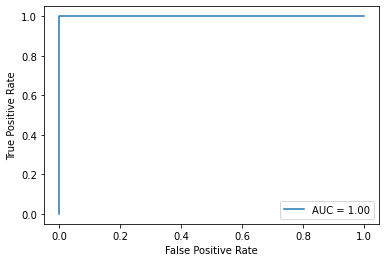

In [32]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [43]:
main_sequence_predict_2=main_sequence_predict_proba[:,0].copy()
main_sequence_predict_2 = np.where(main_sequence_predict_2 >=1, 'Main Sequence', 'Not Main Sequence')
main_sequence_predict_2

array(['Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Sequence', 'Not Main Sequence', 'Not Main Sequence',
       'Not Main Seq

In [44]:
print(metrics.classification_report(test_y, main_sequence_predict_2))

                   precision    recall  f1-score   support

    Main Sequence       0.00      0.00      0.00        15
Not Main Sequence       0.79      1.00      0.88        57

         accuracy                           0.79        72
        macro avg       0.40      0.50      0.44        72
     weighted avg       0.63      0.79      0.70        72



C:\Users\0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
